### Load libraries

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap, shiftgrid, interp, addcyclic
import scipy.io
from scipy.interpolate import griddata
import datetime
#from pylab import *
import numpy.ma as ma
from glob import glob
#from matplotlib.mlab import griddata
#from pylab import *

#import osgeo
#import gdal

from numpy import nan


import string
from scipy import stats
import matplotlib as mpl
import scipy.ndimage as ndimage
from netCDF4 import Dataset
from scipy import signal

import datetime as dt



In [2]:
! ls 

AMOC_ORAS4_1958-2013.nc
ERA-i
Figs_Maps
GEBCO_2014.html
GEBCO_2014_SID_1D.nc
GetERAi.ipynb
Icon?
Maps_fields_Oceanography_ESRL.ipynb
Maps_fields_Oceanography_SST.ipynb
Maps_fields_Oceanography_T2m.ipynb
Maps_fields_Oceanography_winds.ipynb
Maps_fields_paper.ipynb
README
README_ECMWF_LowRes_AMOC_Alicia.txt
RN-6723_1553096328965.zip
Terms_of_use_for_GEBCO's_gridded_bathymetric_data_sets.html
Turkey.pdf
Untitled.ipynb
yycompos.PF2bnmX31s.nc


# T2m NCEP 
https://www.esrl.noaa.gov/psd/cgi-bin/data/composites/printpage.pl

In [30]:
temp=Dataset('air_temp_2010s_minus_1990s.nc',"r")
data=temp['air']
lon, lat = np.meshgrid(temp['lon'],temp['lat'])

In [31]:
data.shape

(1, 73, 144)

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

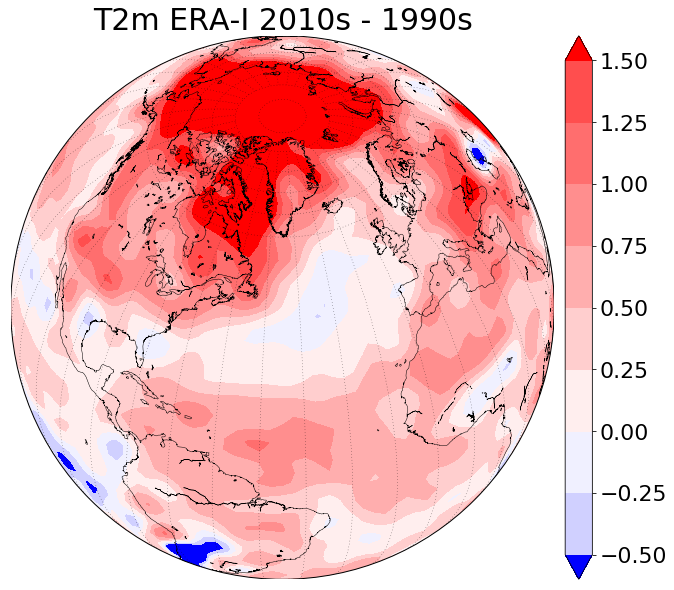

In [34]:
#Plot yearly average 
from matplotlib import cm, rcParams
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=45,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp['lon'],temp['lat'])
#x, y = m(lon, lat)
data_out,lat_out,lon_out=addcyclic(data[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)a
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, data_out,levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('T2m ERA-I 2010s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()



# SST NCEP 
https://www.esrl.noaa.gov/psd/cgi-bin/data/composites/printpage.pl

In [36]:
temp=Dataset('sst_temp_2010s_minus_1990s.nc',"r")
data=temp['skt']
lon, lat = np.meshgrid(temp['lon'],temp['lat'])

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

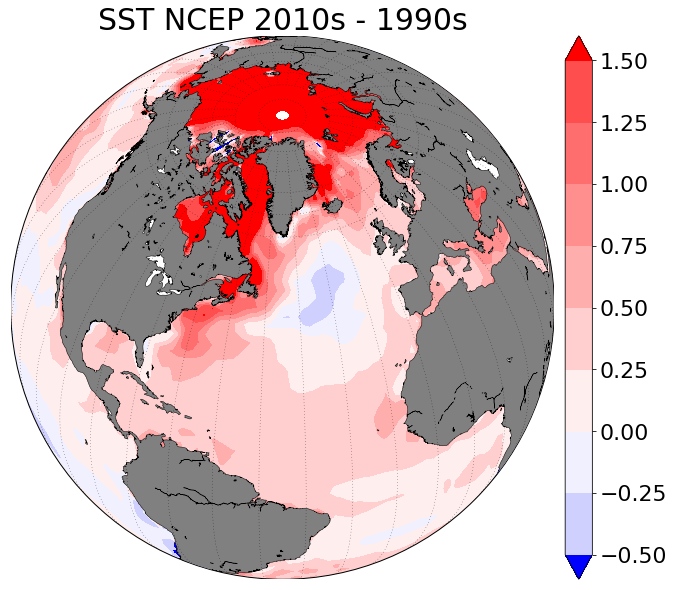

In [39]:
#Plot yearly average 
from matplotlib import cm, rcParams
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=45,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=1.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp['lon'],temp['lat'])
#x, y = m(lon, lat)
data_out,lat_out,lon_out=addcyclic(data[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, data_out,levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('SST NCEP 2010s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()




# Zonal wind NCEP 
https://www.esrl.noaa.gov/psd/cgi-bin/data/composites/printpage.pl

In [87]:
temp1=Dataset('uwind_2010s.nc',"r")
data1=temp1['uwnd']
#lon, lat = np.meshgrid(temp['lon'],temp['lat'])

temp2=Dataset('vwind_2010s.nc',"r")
data2=temp2['vwnd']
#lon, lat = np.meshgrid(temp['lon'],temp['lat'])

temp=Dataset('wind_2010s.nc',"r")
data=temp['wspd']
lon, lat = np.meshgrid(temp['lon'],temp['lat'])

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

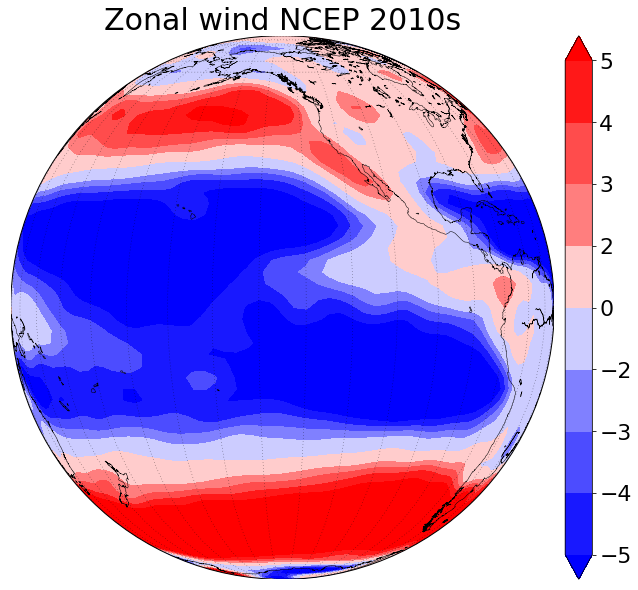

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

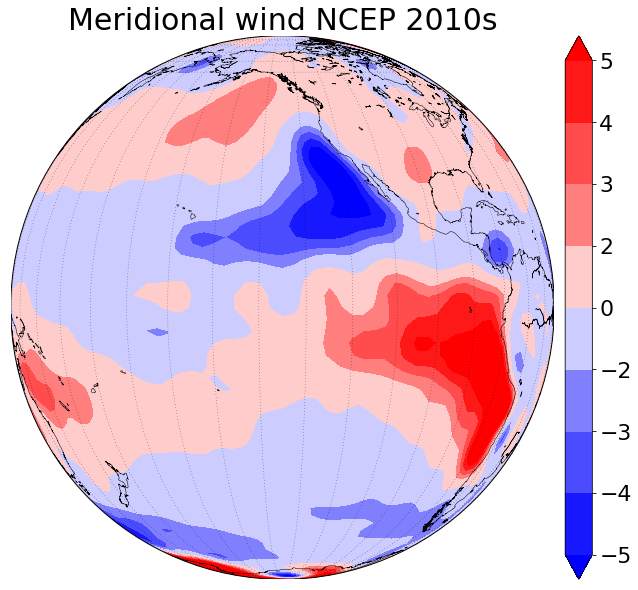

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

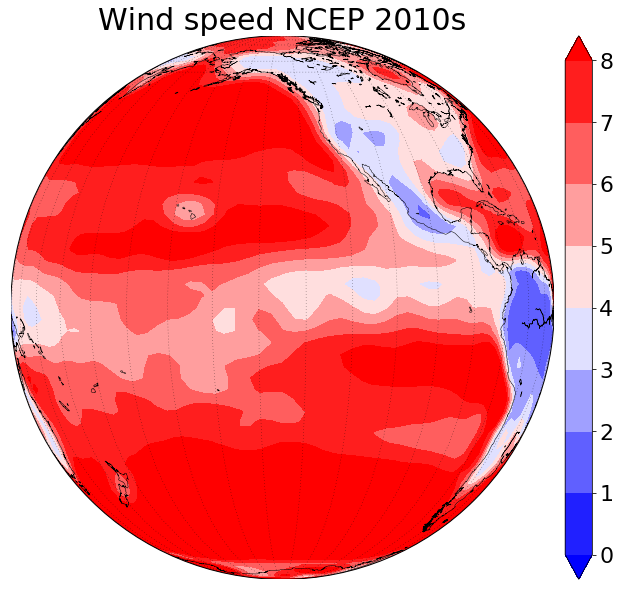

In [88]:
#Plot yearly average 
from matplotlib import cm, rcParams
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=0,lon_0=-135,resolution='l')
#m = Basemap(projection='ortho',lat_0=45,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp['lon'],temp['lat'])
#x, y = m(lon, lat)
data1_out,lat_out,lon_out=addcyclic(data1[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, data1_out,levels=[-5, -4, -3, -2, 0, 2, 3,4,5], extend='both', vmin=-5, vmax=+5,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('Zonal wind NCEP 2010s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()


plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=0,lon_0=-135,resolution='l')
#m = Basemap(projection='ortho',lat_0=45,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp['lon'],temp['lat'])
#x, y = m(lon, lat)
data2_out,lat_out,lon_out=addcyclic(data2[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, data2_out,levels=[-5, -4, -3, -2, 0, 2, 3,4,5], extend='both', vmin=-5, vmax=+5,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('Meridional wind NCEP 2010s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()


plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=0,lon_0=-135,resolution='l')
#m = Basemap(projection='ortho',lat_0=45,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp['lon'],temp['lat'])
#x, y = m(lon, lat)
data_out,lat_out,lon_out=addcyclic(data[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, data_out,levels=[0, 1, 2, 3, 4, 5, 6,7,8], extend='both', vmin=0, vmax=+8,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('Wind speed NCEP 2010s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()






In [49]:
temp1=Dataset('uwind_2010s_minus_1990s.nc',"r")
data1=temp1['uwnd']
lon, lat = np.meshgrid(temp['lon'],temp['lat'])

temp2=Dataset('vwind_2010s_minus_1990s.nc',"r")
data2=temp2['vwnd']
lon, lat = np.meshgrid(temp['lon'],temp['lat'])

temp=Dataset('wind_2010s_minus_1990s.nc',"r")
data=temp['wspd']
lon, lat = np.meshgrid(temp['lon'],temp['lat'])

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

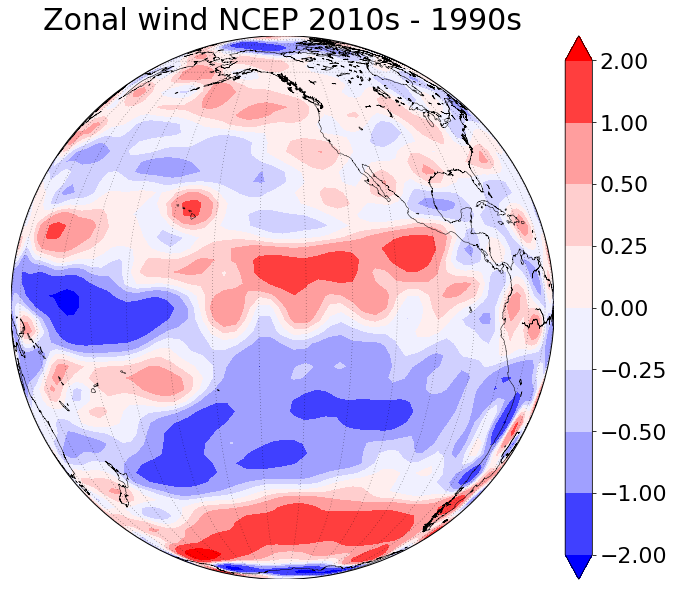

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

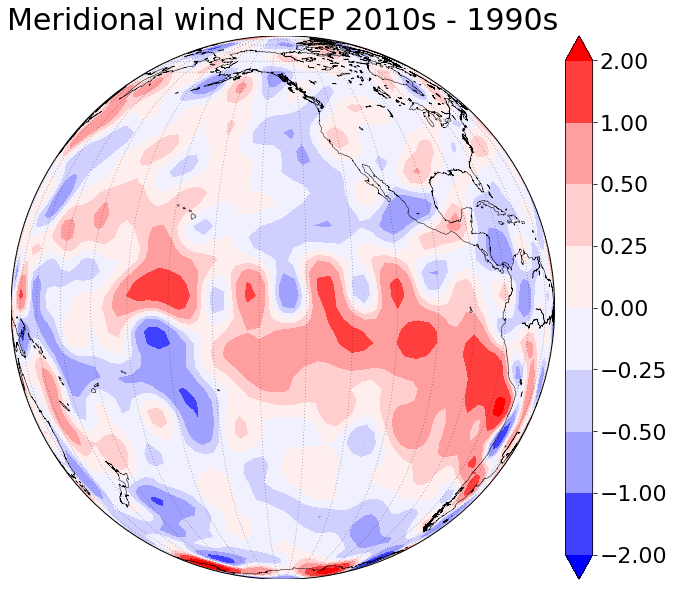

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

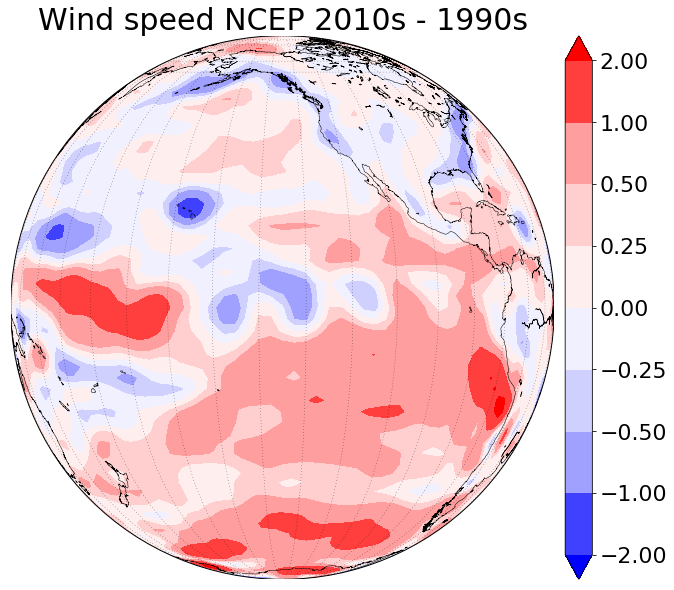

In [51]:
#Plot yearly average 
from matplotlib import cm, rcParams
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=0,lon_0=-135,resolution='l')
#m = Basemap(projection='ortho',lat_0=45,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp['lon'],temp['lat'])
#x, y = m(lon, lat)
data1_out,lat_out,lon_out=addcyclic(data1[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, data1_out,levels=[-2., -1, -0.5, -0.25, 0, 0.25, 0.5,1.,2], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('Zonal wind NCEP 2010s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()


plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=0,lon_0=-135,resolution='l')
#m = Basemap(projection='ortho',lat_0=45,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp['lon'],temp['lat'])
#x, y = m(lon, lat)
data2_out,lat_out,lon_out=addcyclic(data2[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, data2_out,levels=[-2., -1, -0.5, -0.25, 0, 0.25, 0.5,1.,2], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('Meridional wind NCEP 2010s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()


plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=0,lon_0=-135,resolution='l')
#m = Basemap(projection='ortho',lat_0=45,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp['lon'],temp['lat'])
#x, y = m(lon, lat)
data_out,lat_out,lon_out=addcyclic(data[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-0.5, -0.25, 0, 0.25, 0.5, 0.75,1.,1.25,1.5], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, data_out,levels=[-2., -1, -0.5, -0.25, 0, 0.25, 0.5,1.,2], extend='both', vmin=-2, vmax=+2,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('Wind speed NCEP 2010s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()





# Sensible and latent heat flux NCEP 
https://www.esrl.noaa.gov/psd/cgi-bin/data/composites/printpage.pl

In [74]:
temp1=Dataset('He_2010s_minus_1990s.nc',"r")
data1=temp1['lflx']
lon, lat = np.meshgrid(temp1['lon'],temp1['lat'])

temp2=Dataset('Hs_2010s_minus_1990s.nc',"r")
data2=temp2['sflx']
lon, lat = np.meshgrid(temp2['lon'],temp2['lat'])


In [76]:
lon.shape

(90, 180)

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

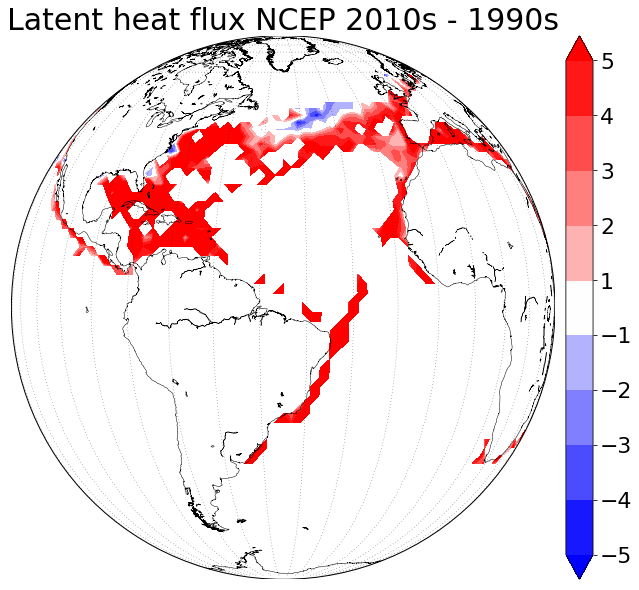

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

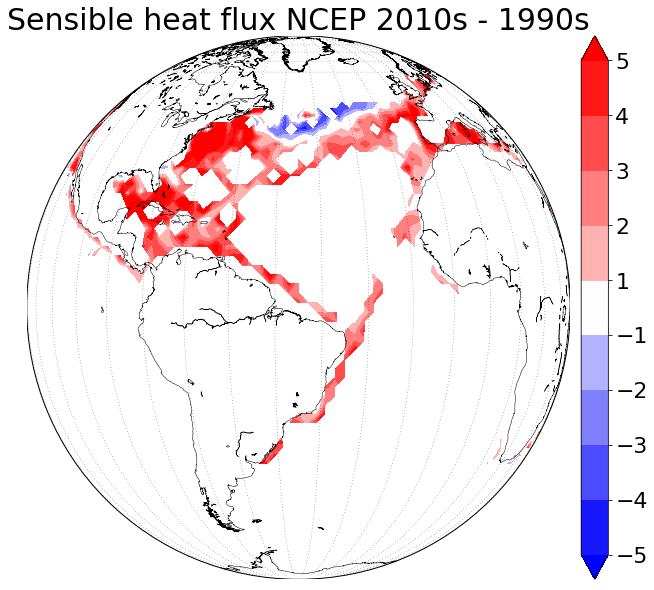

In [84]:
#Plot yearly average 
from matplotlib import cm, rcParams
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(15,10))
#m = Basemap(projection='ortho',lat_0=0,lon_0=-135,resolution='l')
m = Basemap(projection='ortho',lat_0=0,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp1['lon'],temp1['lat'])
#x, y = m(lon, lat)
data1_out,lat_out,lon_out=addcyclic(data1[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-5, -4, -3, -2, -1, 1,2,3,4,5], extend='both', vmin=-5, vmax=+5,cmap=my_cmap)
CS=m.contourf(x, y, data1_out,levels=[-5, -4, -3, -2, -1, 1,2,3,4,5], extend='both', vmin=-5, vmax=+5,cmap=my_cmap)
#CS=m.pcolormesh(x, y, data1_out, vmin=-5, vmax=+5,cmap=my_cmap)

m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('Latent heat flux NCEP 2010s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()


plt.clf()
plt.figure(figsize=(15,10))
#m = Basemap(projection='ortho',lat_0=0,lon_0=-135,resolution='l')
m = Basemap(projection='ortho',lat_0=0,lon_0=-45,resolution='l')
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
#data=data[0]
lon, lat = np.meshgrid(temp2['lon'],temp2['lat'])
#x, y = m(lon, lat)
data2_out,lat_out,lon_out=addcyclic(data2[0,::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
#CS=m.contourf(x, y, data[0],levels=[-5, -4, -3, -2, -1, 1,2,3,4,5], extend='both', vmin=-5, vmax=+5,cmap=my_cmap)
CS=m.contourf(x, y, data2_out,levels=[-5, -4, -3, -2, -1, 1,2,3,4,5], extend='both', vmin=-5, vmax=+5,cmap=my_cmap)
#CS=m.pcolormesh(x, y, data2_out, vmin=-5, vmax=+5,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
plt.title('Sensible heat flux NCEP 2010s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()

In [21]:
#Bug fix for addcyclic
#https://github.com/matplotlib/basemap/blob/master/lib/mpl_toolkits/basemap/__init__.py#L5102
def addcyclic(*arr,**kwargs):
    """
    Adds cyclic (wraparound) points in longitude to one or several arrays,
    the last array being longitudes in degrees. e.g.
   ``data1out, data2out, lonsout = addcyclic(data1,data2,lons)``
    ==============   ====================================================
    Keywords         Description
    ==============   ====================================================
    axis             the dimension representing longitude (default -1,
                     or right-most)
    cyclic           width of periodic domain (default 360)
    ==============   ====================================================
    """
    # get (default) keyword arguments
    axis = kwargs.get('axis',-1)
    cyclic = kwargs.get('cyclic',360)
    # define functions
    def _addcyclic(a):
        """addcyclic function for a single data array"""
        npsel = np.ma if np.ma.is_masked(a) else np
        slicer = [slice(None)] * np.ndim(a)
        try:
            slicer[axis] = slice(0, 1)
        except IndexError:
            raise ValueError('The specified axis does not correspond to an '
                    'array dimension.')
        return npsel.concatenate((a,a[slicer]),axis=axis)
    def _addcyclic_lon(a):
        """addcyclic function for a single longitude array"""
        # select the right numpy functions
        npsel = np.ma if np.ma.is_masked(a) else np
        # get cyclic longitudes
        clon = (np.take(a,[0],axis=axis)
                + cyclic * np.sign(np.diff(np.take(a,[0,-1],axis=axis),axis=axis)))
        # ensure the values do not exceed cyclic
        clonmod = npsel.where(clon<=cyclic,clon,np.mod(clon,cyclic))
        return npsel.concatenate((a,clonmod),axis=axis)
    # process array(s)
    if len(arr) == 1:
        return _addcyclic_lon(arr[-1])
    else:
        return list(map(_addcyclic,arr[:-1])) + [_addcyclic_lon(arr[-1])]